<a href="https://colab.research.google.com/github/Daivageralda/A2-2_Source-Code/blob/main/Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediksi Penerimaan Mahasiswa Berdasarkan Faktor-Faktor yang Mempengaruhi Menggunakan Model Supervised Learning**

##Business Understanding

####Business Objective
Tujuan bisnis dari dataset ini adalah untuk menganalisis faktor-faktor yang mempengaruhi keputusan siswa SMA untuk melanjutkan pendidikan ke perguruan tinggi di Amerika Serikat. Selain itu, juga ingin meningkatkan angka partisipasi pendidikan tinggi di AS dan membuat prediksi diterima atau tidaknya siswa SMA ke perguruan tinggi berdasarkan faktor-faktor yang mempengaruhi

####Assess Situation
Situasi bisnis yang mendasari analisis ini adalah rendahnya angka partisipasi pendidikan tinggi di AS dan masalah kesenjangan pendidikan dan kesempatan pendidikan yang merata antara kelompok sosial dan ekonomi

####Data Mining Goals
Tujuan dari Data Mining pada dataset ini adalah untuk memprediksi keputusan siswa SMA untuk melanjutkan pendidikan ke perguruan tinggi berdasarkan faktor-faktor yang mempengaruhi, menganalisis faktor-faktor yang mempengaruhi keputusan siswa SMA untuk melanjutkan pendidikan ke perguruan tinggi, dan meningkatkan pemahaman tentang profil siswa yang melanjutkan pendidikan ke perguruan tinggi

####Project Plan
Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari sumber yang tersedia. Selanjutnya, data akan dijelaskan karakteristiknya dan pola-pola yang menarik diidentifikasi. Data kemudian dieksplorasi untuk mengidentifikasi korelasi dan hubungan antar variabel. Selain itu, kualitas data akan dinilai dan masalah data akan diidentifikasi agar dapat diatasi dalam tahapan berikutnya. Tahap-tahap ini merupakan langkah penting dalam menjamin keberhasilan dari analisis data

##Data Understanding

####Collect Initial Data
Dataset yang digunakan pada proyek ini adalah dataset "Go To College" yang diunduh dari situs Kaggle.

Link Dataset : https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset

Kemudian dataset ini diekspor ke Github agar lebih mudah digunakan.

Link Github Dataset : https://raw.githubusercontent.com/pa-datamining/dataset/main/Go%20To%20College.csv

####Describe Data
Setiap kolom akan dijelaskan dan dilakukan perhitungan statistika deskriptif (mean, median, modus, standar deviasi) untuk setiap kolom yang memiliki nilai numerik

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/pa-datamining/dataset/main/Go%20To%20College.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


Penjelasan Kolom :

1. "type_school": jenis sekolah yang dihadiri siswa. Tipe data kolom ini adalah objek/string. Non-null countnya adalah 1000.

2. "school_accreditation": akreditasi sekolah yang dihadiri siswa. Tipe data kolom ini adalah objek/string. Non-null countnya adalah 1000.

3. "gender": jenis kelamin siswa. Tipe data kolom ini adalah objek/string. Non-null countnya adalah 1000.

4. "interest": minat siswa dalam hal studi. Tipe data kolom ini adalah objek/string. Non-null countnya adalah 1000.

5. "residence": tempat tinggal siswa (wilayah perkotaan atau pedesaan). Tipe data kolom ini adalah objek/string. Non-null countnya adalah 1000.

5. "parent_age": usia orang tua siswa. Tipe data kolom ini adalah integer. Non-null countnya adalah 1000.

6. "parent_salary": pendapatan orang tua siswa. Tipe data kolom ini adalah integer. Non-null countnya adalah 1000.

7. "house_area": luas rumah keluarga siswa. Tipe data kolom ini adalah float. Non-null countnya adalah 1000.

9. "average_grades": rata-rata nilai siswa. Tipe data kolom ini adalah float. Non-null countnya adalah 1000.

10. "parent_was_in_college": apakah orang tua siswa pernah kuliah atau tidak. Tipe data kolom ini adalah boolean. Non-null countnya adalah 1000.

"will_go_to_college": apakah siswa tersebut akan melanjutkan kuliah atau tidak. Tipe data kolom ini adalah boolean. Non-null countnya adalah 1000.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.00,1000.00,1000.00,1000.00
mean,52.21,5381570.00,74.52,86.10
std,3.50,1397545.91,15.29,3.38
min,40.00,1000000.00,20.00,75.00
25%,50.00,4360000.00,64.60,83.74
50%,52.00,5440000.00,75.50,85.57
75%,54.00,6382500.00,84.83,88.26
max,65.00,10000000.00,120.00,98.00


Berdasarkan hasil di atas dapat diketahui bahwa ada 4 kolom pada data frame yang memiliki nilai numerik, yaitu **'parent_age'**, **'parent_salary'**, **'house_area'**, dan **'average_grades'**

In [ ]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.00,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.80,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.60,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.20,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.10,86.79,False,False


Output di atas merupakan tampilan dataframe dalam bentuk tabel dan hanya 5 indeks saja yang ditampilkan, sebab menggunakan metode **'head()'**

####Explore Data

Setiap kolom atau fitur akan divisualisasikan ke dalam plot, tidak terkecuali kolom yang bertipe numerik maupun kategorikal. Visualisasi akan dibagi menjadi dua tahap, yaitu **Univariate** dan **Bivariate**

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

3 baris di atas merupakan library - library yang digunakan untuk visualisasi pada kolom atau fitur pada dataframe, ke depannya library ini juga akan digunakan untuk visualisasi pada **Data Preparation** dan **Evaluation**

#####Univariate
Visualisasi yang hanya akan melihat distribusi dari tiap - tiap kolom saja

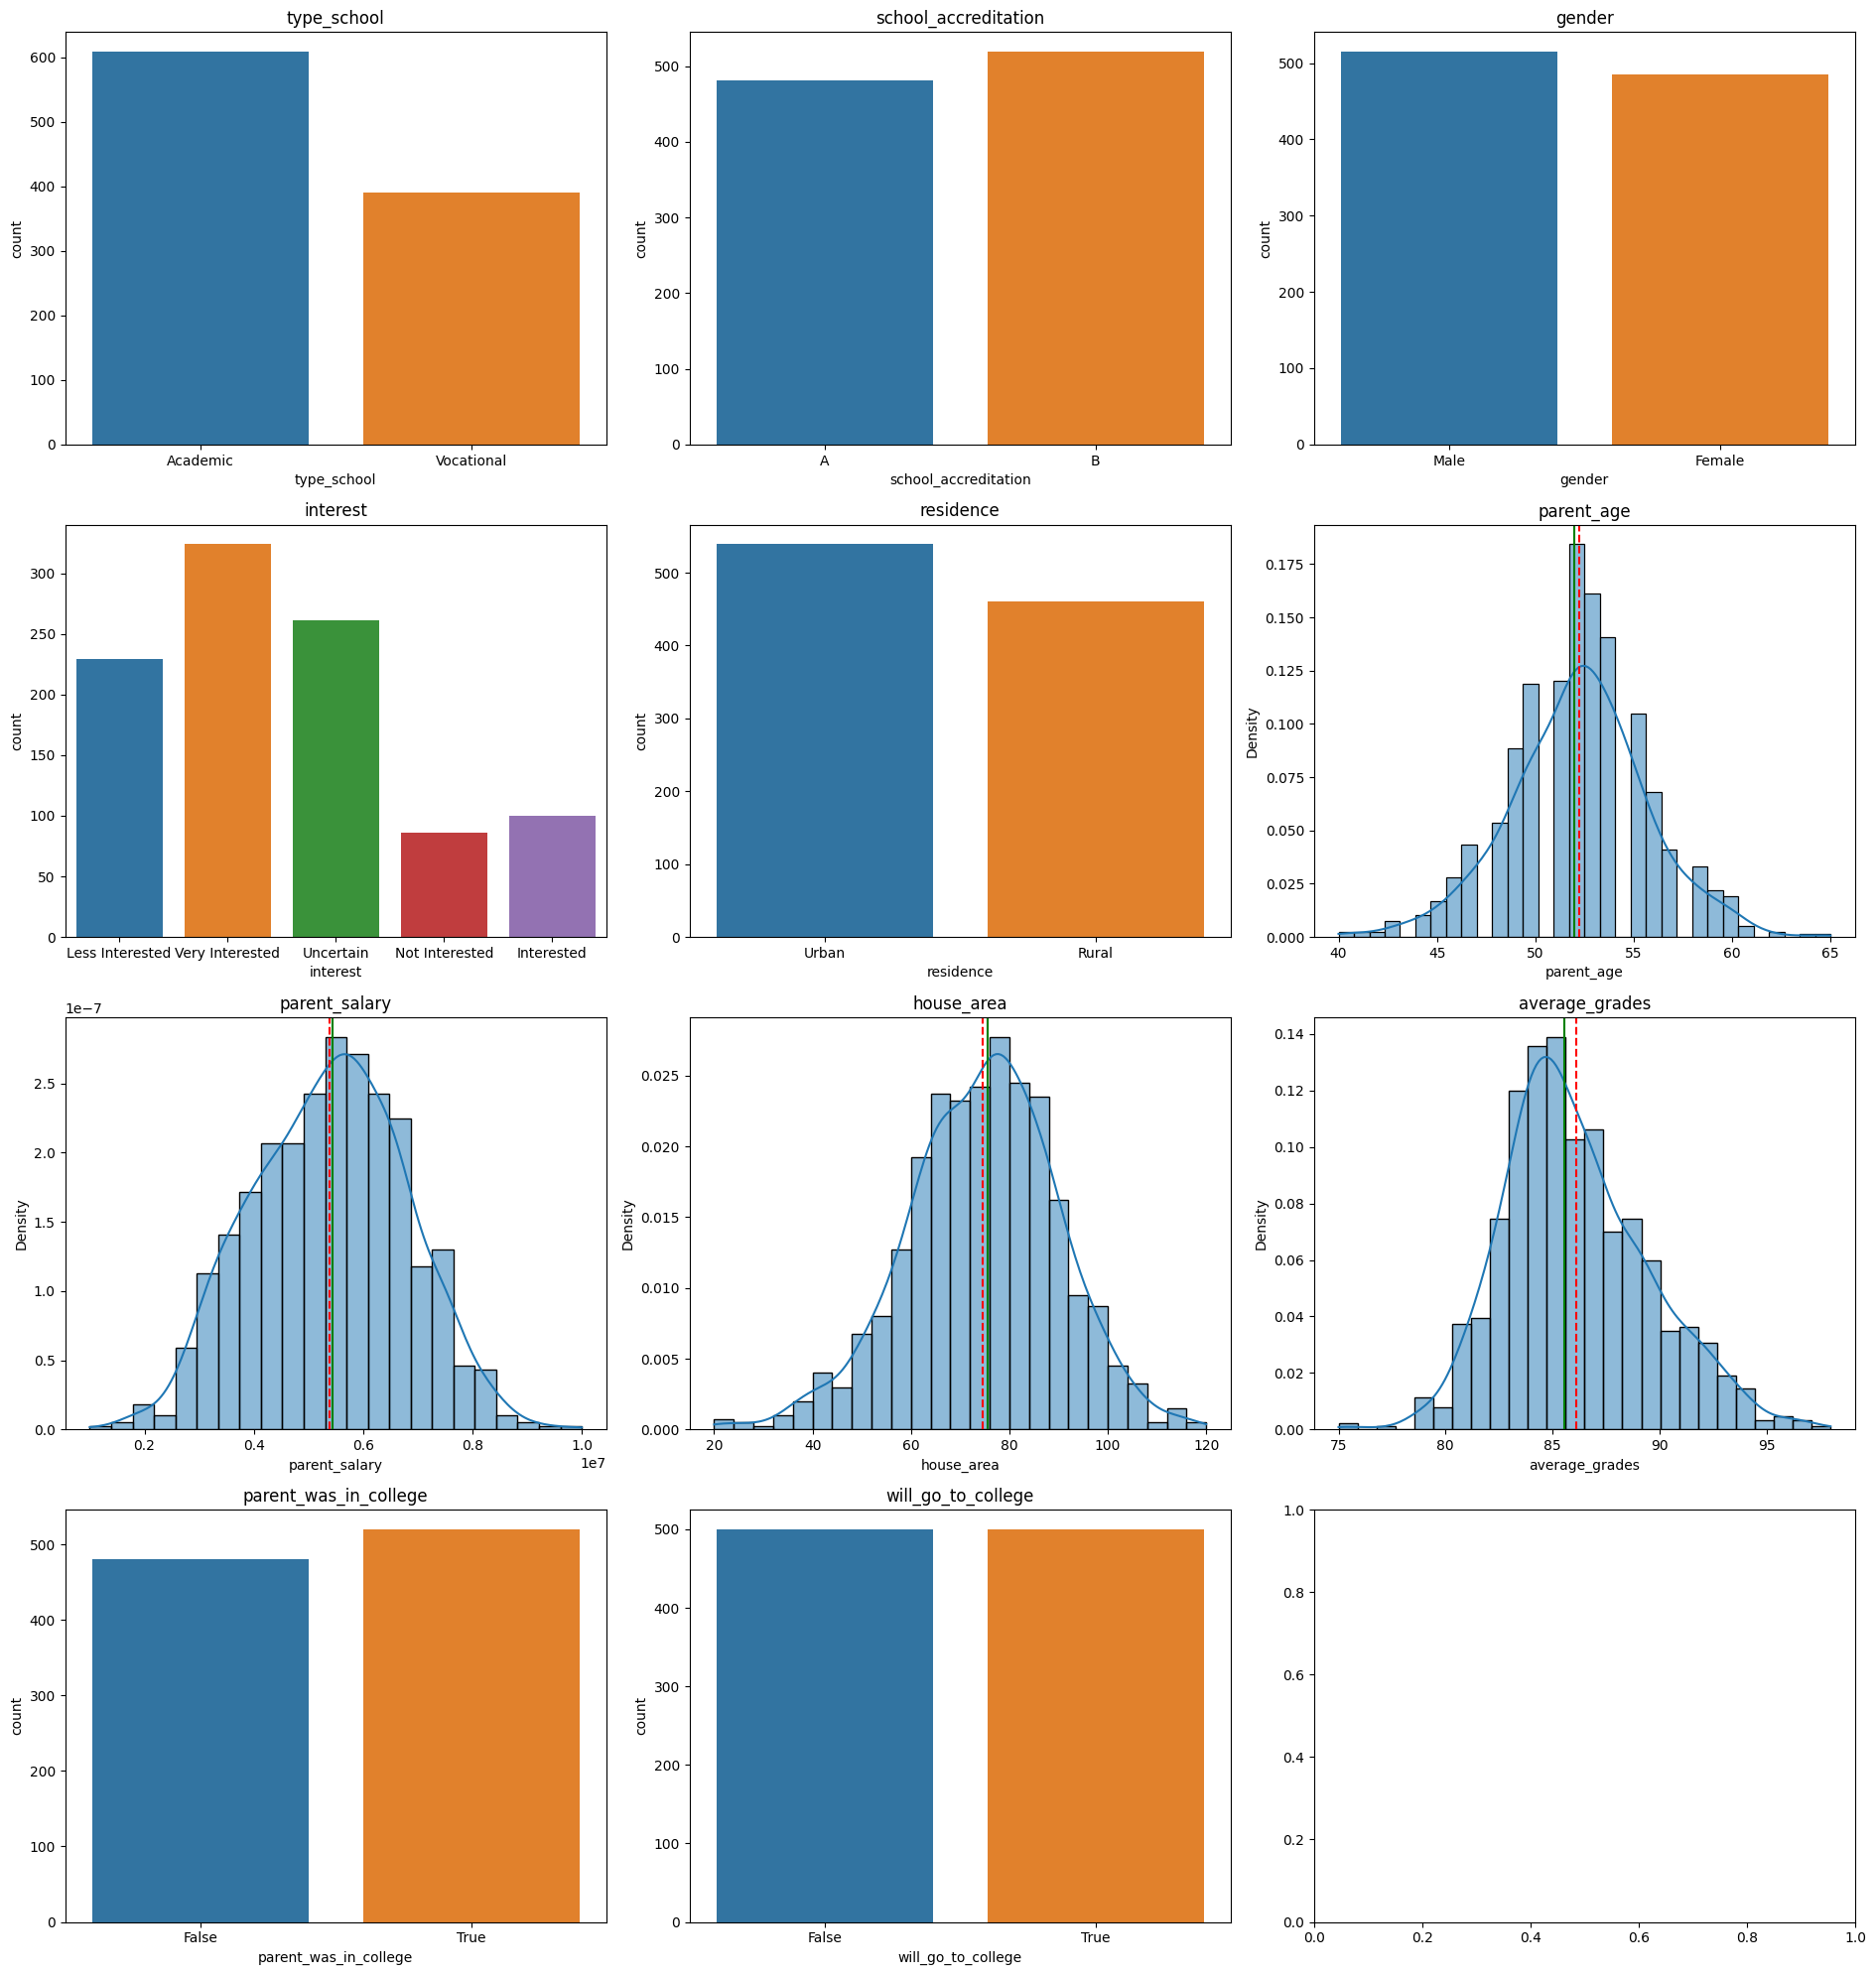

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool', 'object'])

num_rows = int((df_numeric.shape[1] + 2) / 3)  # Update for 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(19, 5 * num_rows))  # Update for 3 columns
axes = axes.ravel()

for i, col in enumerate(df_numeric.columns):
    if df_numeric[col].dtype in ['float64', 'int64']:
        sns.histplot(data=df_numeric, x=col, kde=True, stat='density', ax=axes[i])
        mean = df_numeric[col].mean()
        median = df_numeric[col].median()
        axes[i].axvline(mean, color='r', linestyle='--', label='Mean')
        axes[i].axvline(median, color='g', linestyle='-', label='Median')
    elif df_numeric[col].dtype == 'object':
        sns.countplot(data=df_numeric, x=col, ax=axes[i])
    elif df_numeric[col].dtype == 'bool':
        sns.countplot(data=df_numeric, x=col, ax=axes[i])
        axes[i].set_xticklabels(['False', 'True'])
    
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


Berdasarkan visualisasi yang terlihat, dapat diketahui bahwa kurva yang terbentuk pada histogram kolom numerik mendekati kurva distribusi normal karena memiliki bentuk *bell-shaped*. Sehingga dapat diasumsikan bahwa kolom numerik tersebut memiliki kemungkinan besar didistribusikan secara normal

#####Bivariate
Visualisasi yang menampilkan distribusi antara dua variabel

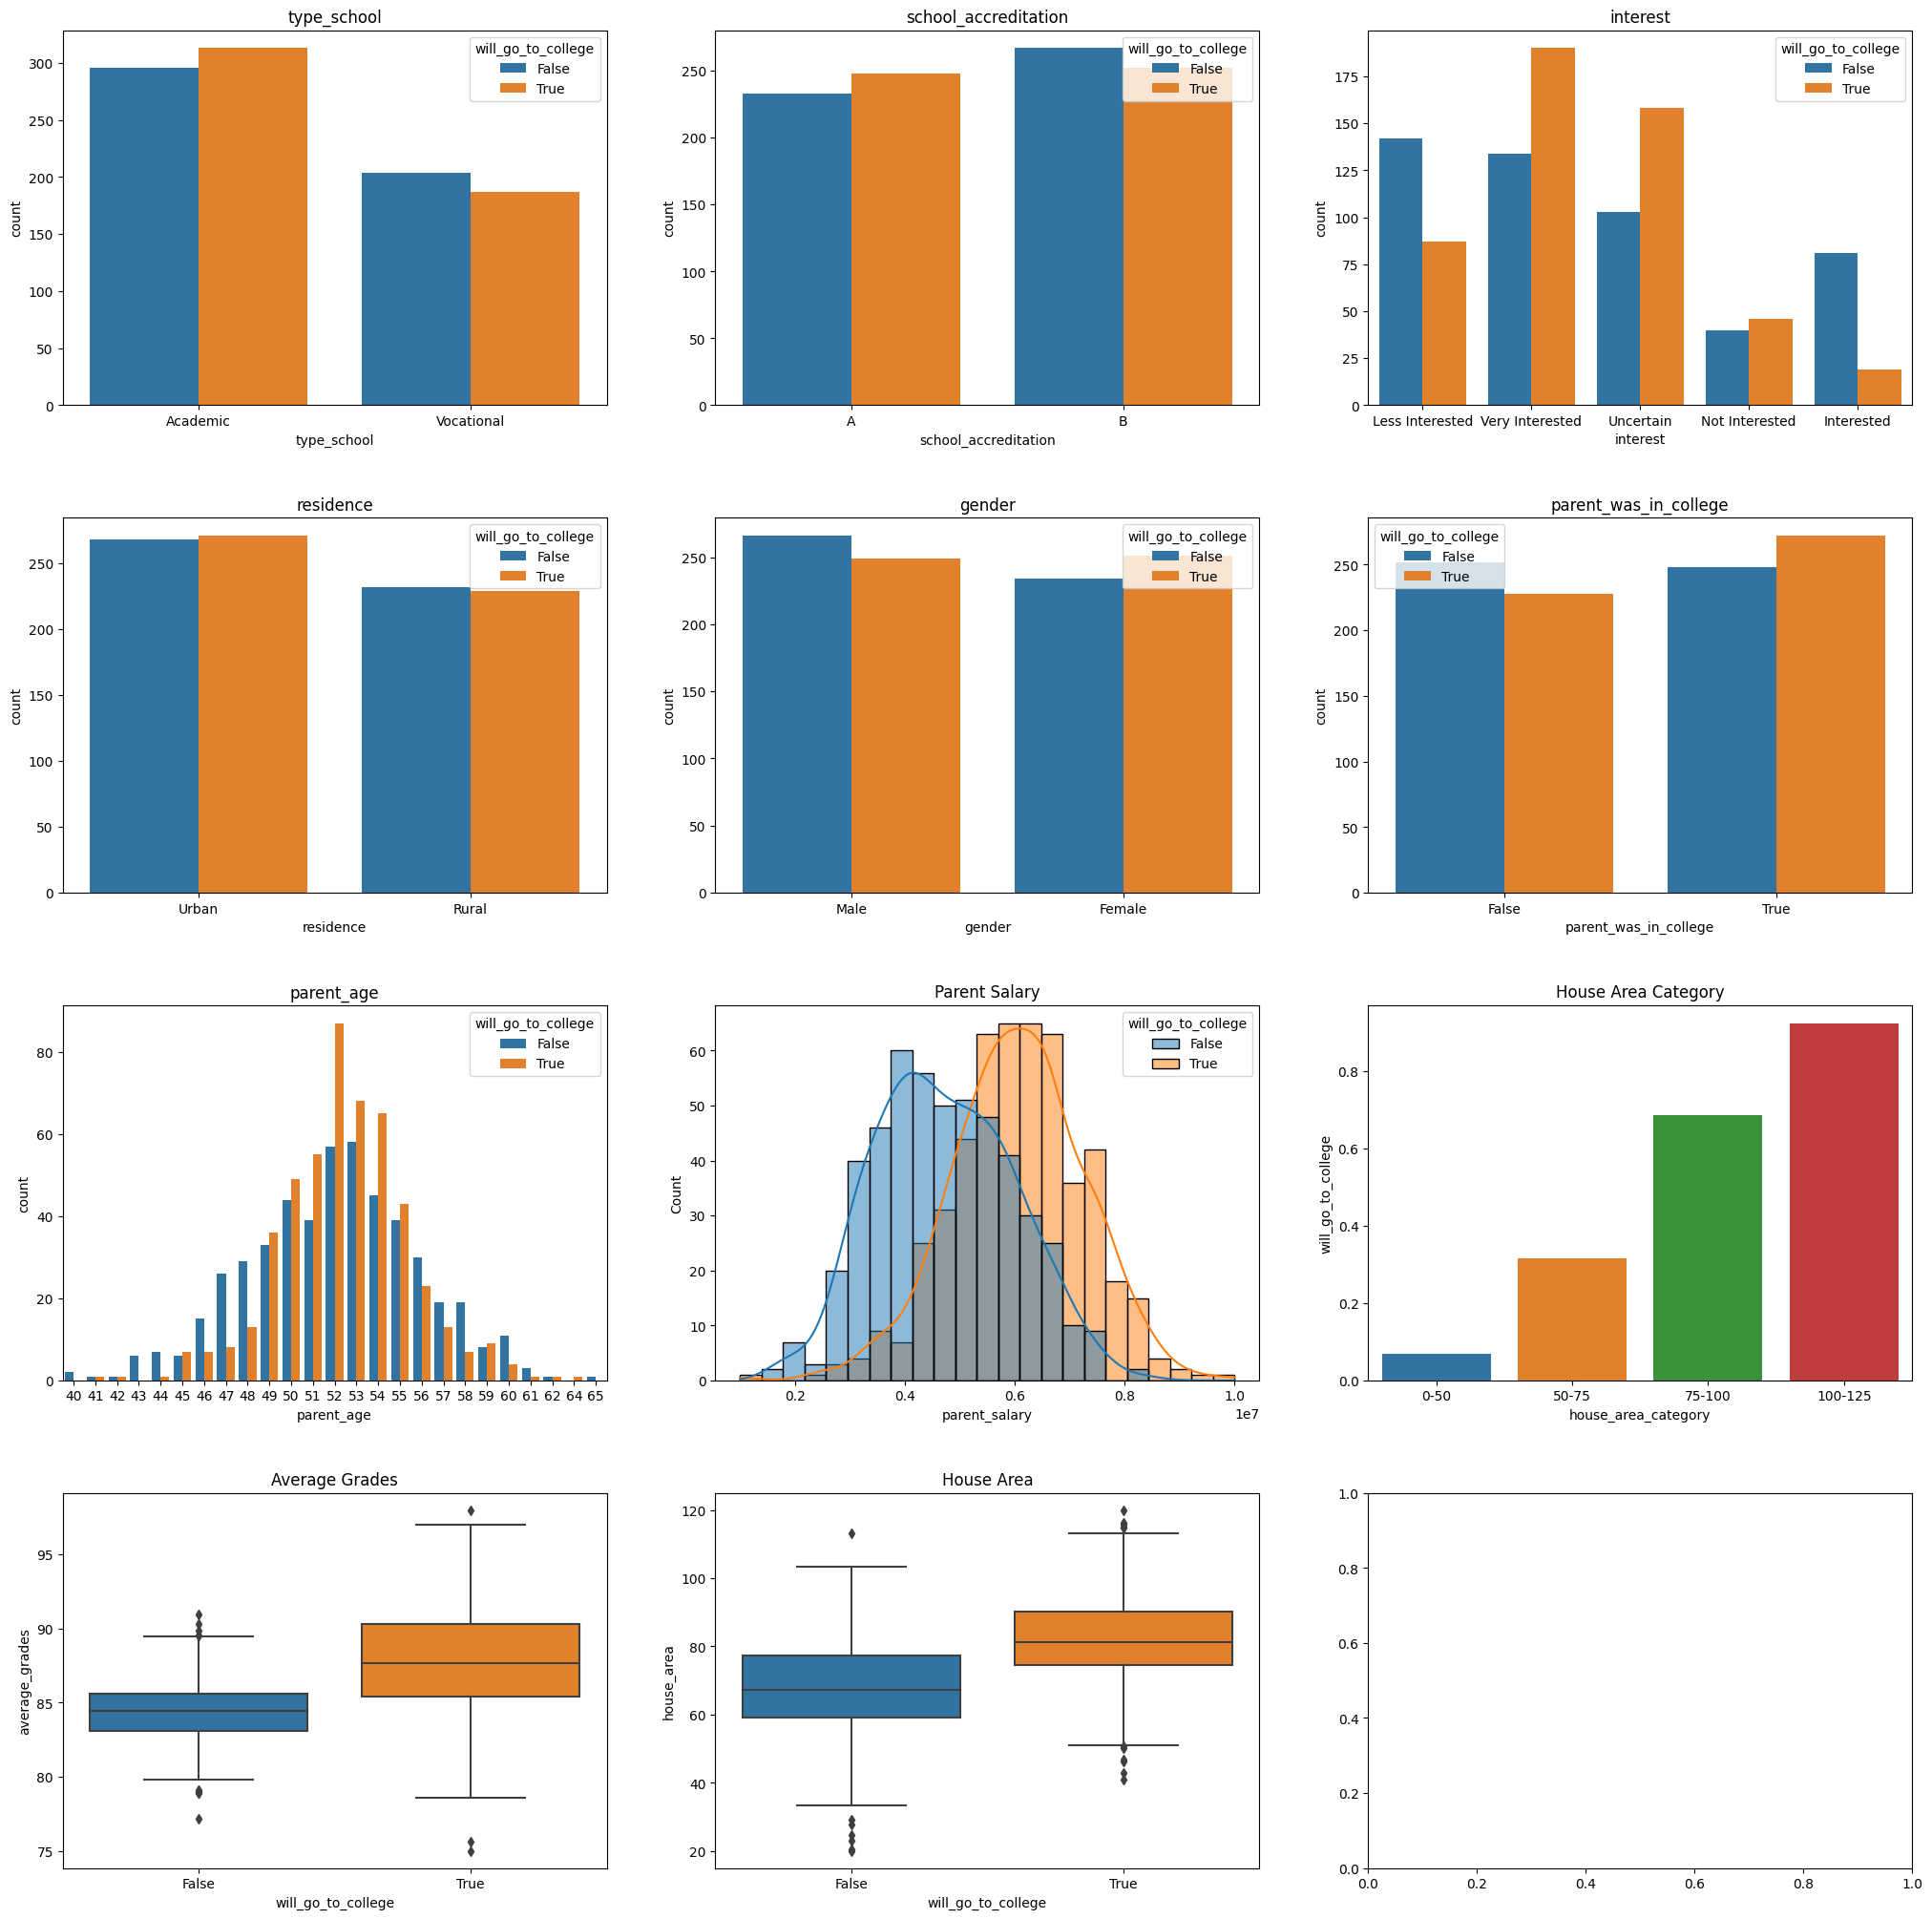

In [ ]:
import math

cols = ["type_school", "school_accreditation", "interest", "residence", "gender", "parent_was_in_college","parent_age"]
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25))

# untuk menampilkan kolom kategorikal dan kolom numerik khusus age
for i, col in enumerate(cols):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(data=df, x=cols[i], hue="will_go_to_college", ax=axes[row, col])
    axes[row, col].set_title(cols[i])
    axes[row, col].tick_params(axis='x')
plt.subplots_adjust(hspace=0.3)

# untuk menampilkan histogram pendapatan orang tua
sns.histplot(data=df, x='parent_salary', hue='will_go_to_college', stat="count",kde=True, ax=axes[2, 1])
axes[2,1].set_title("Parent Salary")
axes[2,1].tick_params(axis="x")

# untuk mengkategorikan luas rumah menjadi 4 kategori
bins = [0, 50, 75, 100, 125]
labels = ['0-50', '50-75', '75-100', '100-125']
df['house_area_category'] = pd.cut(df['house_area'], bins=bins, labels=labels)

# untuk menampilkan barplot kategori luas rumah
house_area_prop = df.groupby('house_area_category')['will_go_to_college'].mean()
sns.barplot(data=house_area_prop.reset_index(), x='house_area_category', y='will_go_to_college', ax=axes[2, 2])
axes[2,2].set_title("House Area Category")
axes[2,2].tick_params(axis="x")

# untuk menampilkan boxplot dari rata - rata nilai dan luar rumah
sns.boxplot(x='will_go_to_college', y='average_grades', data=df,ax=axes[3,0])
axes[3,0].set_title("Average Grades")
axes[3,0].tick_params(axis="x")

sns.boxplot(x='will_go_to_college', y='house_area', data=df,ax=axes[3,1])
axes[3,1].set_title("House Area")
axes[3,1].tick_params(axis="x")

plt.show()

Berdasarkan visualisasi di atas, dapat dilihat distribusi antara kolom kategorikal dengan kolom target yaitu ***'will_go_to_college'***. Selain itu dapat dilihat juga distribusi antara kolom numerik dengan kolom target, pada distibusi antara **'rata-rata nilai'** dan **'luas rumah'** terdapat titik - titk yang terletak di luar garis batas dari boxplot, hal ini menandakan bahwa pada kolom tersebut memiliki beberapa outliers yang akan dipertimbangkan dan diatasi dengan metode yang tepat agar tidak mengganggu analisis data

####Verify Data Quality
Dilakukan pengecekan kualitas data untuk memastikan bahwa data yang digunakan dalam proses pemodelan sudah teruji dan valid, sehingga menghasilkan pemodelan yang berkualitas.

In [ ]:
df.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
house_area_category      0
dtype: int64

Output di atas menyatakan bahwa tidak ada kolom yang memiliki data kosong atau **'*NaN*'**

In [ ]:
df[df.duplicated()]

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,house_area_category


Output di atas menyatakan bahwa dataframe tersebut tidak memiliki baris yang terduplikat

In [ ]:
# List untuk menyimpan hasil
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
parent_age,2.00
parent_salary,0.20
house_area,1.10
average_grades,1.20


Tabel di atas menunjukkan persentase outliers pada kolom numerik. Dalam kasus ini, data outliers dibiarkan karena persentasenya kurang dari 5%, yang berarti jumlah data outliers-nya sedikit.

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Visualisasi di atas menunjukkan korelasi antara kolom numerik dan kolom bertipe boolean pada dataframe. Terlihat bahwa terdapat korelasi yang kuat antara kolom **'average_grades'** dengan kolom target **'will_go_to_college'** yang bernilai 0,5. Hal ini dapat diinterpretasikan bahwa semakin tinggi nilai rata-rata siswa, semakin tinggi kemungkinannya untuk melanjutkan pendidikan ke perguruan tinggi. Dengan demikian, dapat disimpulkan bahwa nilai rata-rata siswa dapat menjadi faktor yang memengaruhi keputusan siswa untuk melanjutkan pendidikan ke jenjang yang lebih tinggi.

##Data Preparation

####Select Data
Data yang dipilih adalah data yang bersumber dari kaggle dan sudah diekspor ke dalam github agar lebih mudah digunakan. Data ini berisikan 1000 baris dan 12 kolom dengan 10 kolom fitur dan 1 kolom target yang bernama **'will_go_to_college'** serta 1 kolom fitur tambahan yaitu **'house_area_category'**

In [ ]:
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,house_area_category
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.00,84.09,False,True,75-100
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.80,86.91,False,True,75-100
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.60,87.43,False,True,75-100
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.20,82.12,True,True,75-100
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.10,86.79,False,False,75-100
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.60,85.99,True,True,50-75
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.30,89.72,True,True,75-100
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.20,79.56,False,True,75-100
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.80,87.18,True,True,100-125


####Cleaning Data
Meliputi proses penghapusan data kosong, penghapusan outliers berdasarkan syarat tertentu, dan penghapusan data yang terduplikat agar proses analisis yang dilakukan dapat memberikan hasil yang optimal

In [ ]:
df.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
house_area_category      0
dtype: int64

Output di atas menunjukkan bahwa setiap kolom pada dataframe tidak memiliki nilai yang kosong

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75) 
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)


Kolom,Persentase Outliers
parent_age,2.00
parent_salary,0.20
house_area,1.10
average_grades,1.20


Tabel di atas menunjukkan persentase outliers pada kolom numerik dalam dataframe, kolom - kolom tersebut akan dibiarkan keberadaannya sebab persentasenya masih di bawah 5% dan keberadaannya mungkin saja bisa digunakan untuk meningkatkan keterbukaan pada analisis yang akan dilakukan

In [ ]:
print('Jumlah data yang terduplikat :',df.duplicated().sum())

Jumlah data yang terduplikat : 0


Output di atas menunjukkan bahwa dataframe tidak memiliki nilai yang terduplikat, sehingga dapat disimpulkan bahwa proses cleaning data telah selesai

####Transform Data
Dilakukan untuk mengubah data menjadi bentuk baru yang lebih mudah digunakan

In [ ]:
df['parent_was_in_college'] = df['parent_was_in_college'].map({True:1,False:0})
df['will_go_to_college'] = df['will_go_to_college'].map({True:1,False:0})
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,house_area_category
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.00,84.09,0,1,75-100
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.80,86.91,0,1,75-100
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.60,87.43,0,1,75-100
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.20,82.12,1,1,75-100
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.10,86.79,0,0,75-100


Output di atas menunjukkan 5 indeks pertama dari dataframe yang sudah dilakukan transformasi pada kolom **parent_was_in_college**, dari tipe data boolean menjadi numerik dengan keterangan 1 untuk **True** dan 0 untuk **False**

####Reduction Data
Dilakukan untuk menghilangkan atau menghapus kolom yang tidak keberadaannya tidak terlalu berpengaruh terhadap analisis yang akan dilakukan

In [ ]:
df = df.drop('house_area_category',axis=1)
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.00,84.09,0,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.80,86.91,0,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.60,87.43,0,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.20,82.12,1,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.10,86.79,0,0


Output di atas menunjukkan 5 indeks pertama dari dataframe yang sudah direduksi dengan menghapus kolom **house_area_category** disebabkan kolom tersebut merupakan kolom tambahan dan tidak berpengaruh sama sekali terhadap analisis

####Slicing Data
Untuk mendapatkan data yang relevan, akan dilakukan pemilihan subset data dengan mengambil data yang telah dihapus outliers-nya. Hal ini dilakukan agar data yang digunakan lebih representatif dan dapat memberikan informasi yang lebih akurat.

In [ ]:
cols = df.select_dtypes(include=['float64', 'int64'])

# Mencari nilai Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

# Menghitung lower bound dan upper bound untuk setiap kolom numerik
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang merupakan outliers
outliers = (cols < lower_bound) | (cols > upper_bound)

# Mengganti nilai outliers dengan NaN
cols[outliers] = np.nan

# Menggabungkan kolom numerik yang sudah dihandle dengan kolom kategorikal dan menjadikan datafram baru
df_handled = pd.concat([cols, df.select_dtypes(exclude=['float64', 'int64'])], axis=1)

# Menghapus baris yang memiliki nilai NaN pada kolom numerik
df_handled = df_handled.dropna()

####Format Data
Data diubah formatnya menggunakan teknik one hot encoding untuk mewakili setiap nilai unik dalam variabel kategorikal dengan satu kolom biner. Nilai-nilai tersebut kemudian diisi dengan 0 atau 1 tergantung pada kehadiran nilai tersebut pada sampel tertentu.

In [ ]:
df_final = pd.get_dummies(df_handled)

####Splitting Data
Dilakukan untuk membagi data menjadi dua bagian, yaitu data latih dan data uji. Data latih digunakan untuk melatih model atau algoritma yang akan digunakan, sedangkan data uji digunakan untuk mengevaluasi performa model yang telah dilatih pada data latih. 

In [ ]:
df_final

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,interest_Interested,interest_Less Interested,interest_Not Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban
0,56.00,6950000.00,83.00,84.09,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1
1,57.00,4410000.00,76.80,86.91,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1
2,50.00,6500000.00,80.60,87.43,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1
3,49.00,6600000.00,78.20,82.12,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0
4,57.00,5250000.00,75.10,86.79,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49.00,7420000.00,63.60,85.99,1,1,0,1,1,0,1,0,0,0,0,0,1,1,0
996,51.00,7480000.00,84.30,89.72,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0
997,49.00,5550000.00,75.20,79.56,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1
998,53.00,5840000.00,105.80,87.18,1,1,1,0,0,1,0,1,0,0,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x = df_final.drop('will_go_to_college',axis=1)
y = df_final['will_go_to_college']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Pada kode di atas, dilakukan pembagian data dengan rasio 70:30, dimana 70% untuk data latih dan 30% untuk data uji

####Cross Validation
Validasi silang dilakukan untuk mengevaluasi kinerja model secara objektif dan mencegah overfitting atau underfitting. Pada kasus ini, teknik validasi silang digunakan untuk menentukan nilai k yang optimal dalam membangun model yang lebih akurat.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# definisikan model KNN
clf = KNeighborsClassifier()

# definisikan hyperparameter yang ingin diuji
param_grid = {'n_neighbors': [3, 5, 7, 9,11,13,15,17,19]}

# inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# latih model dengan GridSearchCV
grid_search.fit(x_train, y_train)

# tampilkan parameter terbaik
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])

# tampilkan skor validasi terbaik
print("Skor validasinya:", grid_search.best_score_)


Nilai k terbaik: 15
Skor validasinya: 0.7155313657277522


Output di atas menunjukkan bahwa nilai k yang optimal dalam kasus ini adalah yang bernilai lima belas dengan skor validasi 0.71.

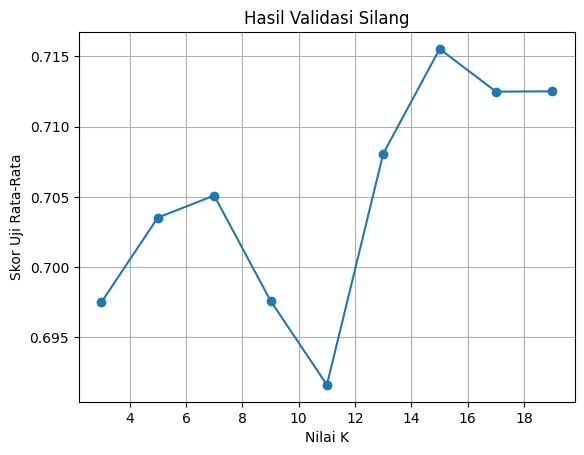

In [ ]:
# ambil nilai skor validasi dari grid search
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# plot hasil dari grid search
plt.errorbar(
    [params[i]['n_neighbors'] for i in range(len(params))],
    mean_scores,
    fmt='o-'
)
plt.xlabel('Nilai K')
plt.ylabel('Skor Uji Rata-Rata')
plt.title('Hasil Validasi Silang')
plt.grid(True)
plt.show()

Visualisasi di atas menunjukkan hasil dari validasi silang yang telah dilakukan. Dapat dilihat bahwa titik tertinggi pada grafik terletak pada nilai k yang sama dengan 15.

##Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
import numpy as np

####Pre-Processing
Pada analisis ini akan dilakukan penskalaan, yaitu proses transformasi data numerik sehingga skala nilainya menjadi sama atau seimbang. Pensklaan berguna untuk meningkatkan kinerja model dan memastikan bahwa variabel yang mempunyai skala yang lebih besar tidak mendominasi variabel lainnya dalam proses pembelajaran model.

In [ ]:
# Inisiasi objek scaler
scaler = StandardScaler()

# Lakukan scaling pada data train
x_train_scaled = scaler.fit_transform(x_train)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
x_test_scaled = scaler.transform(x_test)

Berdasarkan kode di atas, fitur-fitur pada data latih dan data uji akan diubah skala nilainya dengan tujuan untuk menjaga keseimbangan pada nilai-nilai fitur tersebut.

####Modelling

######Naive Bayes
Algoritma ini merupakan metode klasifikasi yang menggunakan probabilitas dan asumsi bahwa setiap fitur input adalah independen satu sama lain, sehingga disebut "naive". Dengan memanfaatkan probabilitas, algoritma ini dapat menghasilkan prediksi penerimaan mahasiswa berdasarkan faktor-faktor yang mempengaruhi secara efisien.

In [ ]:
# class GaussianNB:
#     # Constructor
#     def __init__(self):
#         self.sigmas = dict()
#         self.dispersions = dict()
#         self.probs = dict()
#         self.targets = list()
#         self.columns = list()
    
#     # Fit method
#     def fit(self, x, y):
#         self.__init__()
        
#         # Preparing DataFrame
#         dataset = pd.DataFrame(data=x, index=None)
#         dataset[y.name] = y
        
#         # Preparing sigma / dispersion dictionaries 
#         for column in dataset.drop(y.name, axis=1):
#             self.sigmas[column] = dict()
#             self.dispersions[column] = dict()
#             for target in dataset[y.name].unique():
#                 sample = np.array(dataset.query('{0} == @target'.format(y.name))[column])
#                 self.sigmas[column][target] = sample.std()
#                 self.dispersions[column][target] = sample.mean()
#                 self.probs[column] = len(sample) / len(x)
        
#         self.targets = dataset[y.name].unique()
#         self.columns = x.columns
    
#     # Predict method
#     def predict(self, X):
#         predicts = list()
#         for row in X.to_numpy():
#             target_prob_dict = dict()
#             for target in self.targets:
#                 for x, column in zip(row, self.columns[:-1]):
#                     x = float(x)
#                     sigma = self.sigmas[column][target]
#                     dispersion = self.dispersions[column][target]
#                     prob = self.probs[column]
#                     target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob
#                     target_prob_dict[target] = target_prob_dict.get(target, 1) * target_prob
#             predicts.append(max(target_prob_dict, key=target_prob_dict.get))
#         return predicts

In [ ]:
  # Mendefinisikan model Naive Bayes
  gnb = GaussianNB()

  # Melatih model Naive Bayes
  gnb.fit(x_train_scaled, y_train)

  # Percobaan pengujian prediksi
  gnb_pred = gnb.predict(x_test_scaled)

#####K-Nearest Neighbor
Algoritma KNN (K-Nearest Neighbors) digunakan untuk melakukan klasifikasi atau regresi dengan mencari tetangga terdekat dari data yang akan diprediksi dan menentukan label atau nilai target berdasarkan mayoritas tetangga terdekat. Pada analisis prediksi penerimaan mahasiswa, algoritma KNN akan mencari data mahasiswa lain yang memiliki faktor-faktor yang mirip dengan calon mahasiswa yang akan diprediksi dan menentukan kemungkinan penerimaan berdasarkan jumlah tetangga terdekat yang diterima.

In [ ]:
# import numpy as np

# class KNeighbors:
#     def __init__(self, n_neighbors=None):
#         self.n_neighbors = n_neighbors
        
#     def fit(self, X, y):
#         self.X_train = np.array(X)
#         self.y_train = np.array(y)
        
#     def predict(self, X_test):
#         X_test = np.array(X_test)
#         y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
#         for i, x_test in enumerate(X_test):
#             distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
#             indices = np.argsort(distances)[:self.n_neighbors]
#             k_nearest_classes = self.y_train[indices]
#             y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
#         return y_pred

In [ ]:
# Mendefinisikan model KNN dengan k=15
knn = KNeighborsClassifier(n_neighbors=15)

# Melatih model knn
knn.fit(x_train_scaled, y_train)

# Percobaan pengujian prediksi
knn_pred = knn.predict(x_test_scaled)

#####C4.5 (Decission Tree Classifier)
Algoritma C4.5 adalah salah satu algoritma supervised learning yang digunakan untuk membangun model decision tree. C4.5 bekerja dengan membagi dataset menjadi subset yang lebih kecil dan homogen berdasarkan fitur-fitur yang memiliki informasi paling tinggi, dan kemudian membuat keputusan berdasarkan aturan-aturan yang ditemukan pada tree. Algoritma ini dapat digunakan untuk memprediksi penerimaan mahasiswa berdasarkan faktor-faktor yang mempengaruhi dengan akurasi yang tinggi.

In [ ]:
class Node:
    def __init__(self):
        # Link ke node turunan kiri dan kanan
        self.right = None
        self.left = None
        
        # berasal dari kriteria pemisahan
        self.column = None
        self.threshold = None
        
        # probabilitas untuk objek di dalam Node untuk dimiliki untuk masing-masing kelas yang diberikan
        self.probas = None

        # kedalaman node yang diberikan
        self.depth = None
        
        # apakah itu Node root atau bukan
        self.is_terminal = False

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.classes = None
        
        # Pohon keputusan itu sendiri
        self.Tree = None
    
    def nodeProbas(self, y):
        '''
        Menghitung probabilitas kelas dalam node tertentu
        '''
        probas = []
        
        # Menghitung probabilitas untuk setiap label unik
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        '''
        Menghitung kriteria gini
        '''
        
        return 1 - np.sum(probas**2)
    
    def calcImpurity(self, y):
        '''
        Pembungkus untuk perhitungan impurity. Menghitung probability terlebih dahulu dan kemudian meneruskannya
        ke kriteria Gini
        '''
        
        return self.gini(self.nodeProbas(y))
    
    def calcBestSplit(self, X, y):
        '''
        Menghitung pemisahan terbaik untuk simpul pohon
        '''
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        impurityBefore = self.calcImpurity(y)
        # Untuk setiap kolom pada X
        for col in range(X.shape[1]):
            x_col = X[:, col]
  
            # Untuk setiap nilai pada kolom
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
        
                # Hitung impurity untuk node kanan dan kiri
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)
                
                # Menghitung gain
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                
                # Jika infoGain ini lebih baik dari yang lainnya
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
                    
        
        # Kondisi jika tidak mendapat pembagian terbaik
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        # Membuat pembagian terbaik
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right
                
    def buildDT(self, X, y, node):
        '''
        Membangun pohon keputusan dari atas ke bawah secara rekursif
        '''
        # Memeriksa kondisi node
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        
        # Menghitung Pemisahan
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        if splitCol is None:
            node.is_terminal = True
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        node.column = splitCol
        node.threshold = thresh
        
        # Membuat node anak di bagian kiri dan kanan
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        
        # Membagi secara rekursif
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)
        
    def fit(self, X, y):
        '''
        Melatih model melalui penyesuaian standar
        '''
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        
        self.classes = np.unique(y)
        # root node creation
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        self.buildDT(X, y, self.Tree)
    
    def predictSample(self, x, node):
        '''
        Melewati satu objek melalui decision tree dan mengembalikan probabilitas untuk masing - masing masing-masing kelas
        '''
        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.probas
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)    
        return probas
        
    def predict(self, X):
        '''
        Mengembalikan Hasil Prediksi Setiap Nilai X
        '''
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        
        return np.asarray(predictions)

In [ ]:
# Mendefinisikan model Decission Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split=2)

# Melatih model Decission Tree Classifier
dtc.fit(x_train_scaled, y_train)

# Percobaan pengujian prediksi
dtc_pred = dtc.predict(x_test_scaled)

##Evaluation
Evaluasi pada analisis ini akan dilakukan menggunakan confusion matrix. Confusion matrix merupakan sebuah matriks yang digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan nilai aktual dan prediksi dari suatu model. Terdapat empat nilai dalam confusion matrix, yaitu True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN). Dari nilai-nilai ini, kita dapat menghitung akurasi, presisi, dan recall. Akurasi merupakan rasio prediksi yang benar dari semua prediksi. Presisi merupakan rasio prediksi benar positif dari semua prediksi positif. Recall merupakan rasio prediksi benar positif dari semua kasus positif yang sebenarnya.

Selain ketiga metrik tersebut, f1-score juga digunakan untuk mengevaluasi kinerja model. F1-score adalah harmonic mean dari presisi dan recall. F1-score memberikan nilai rata-rata harmonik dari precision dan recall, yang dianggap lebih cocok untuk dataset yang tidak seimbang. Semakin mendekati 1 nilai dari akurasi, presisi, recall, dan f1-score, maka semakin baik kinerja model yang digunakan.

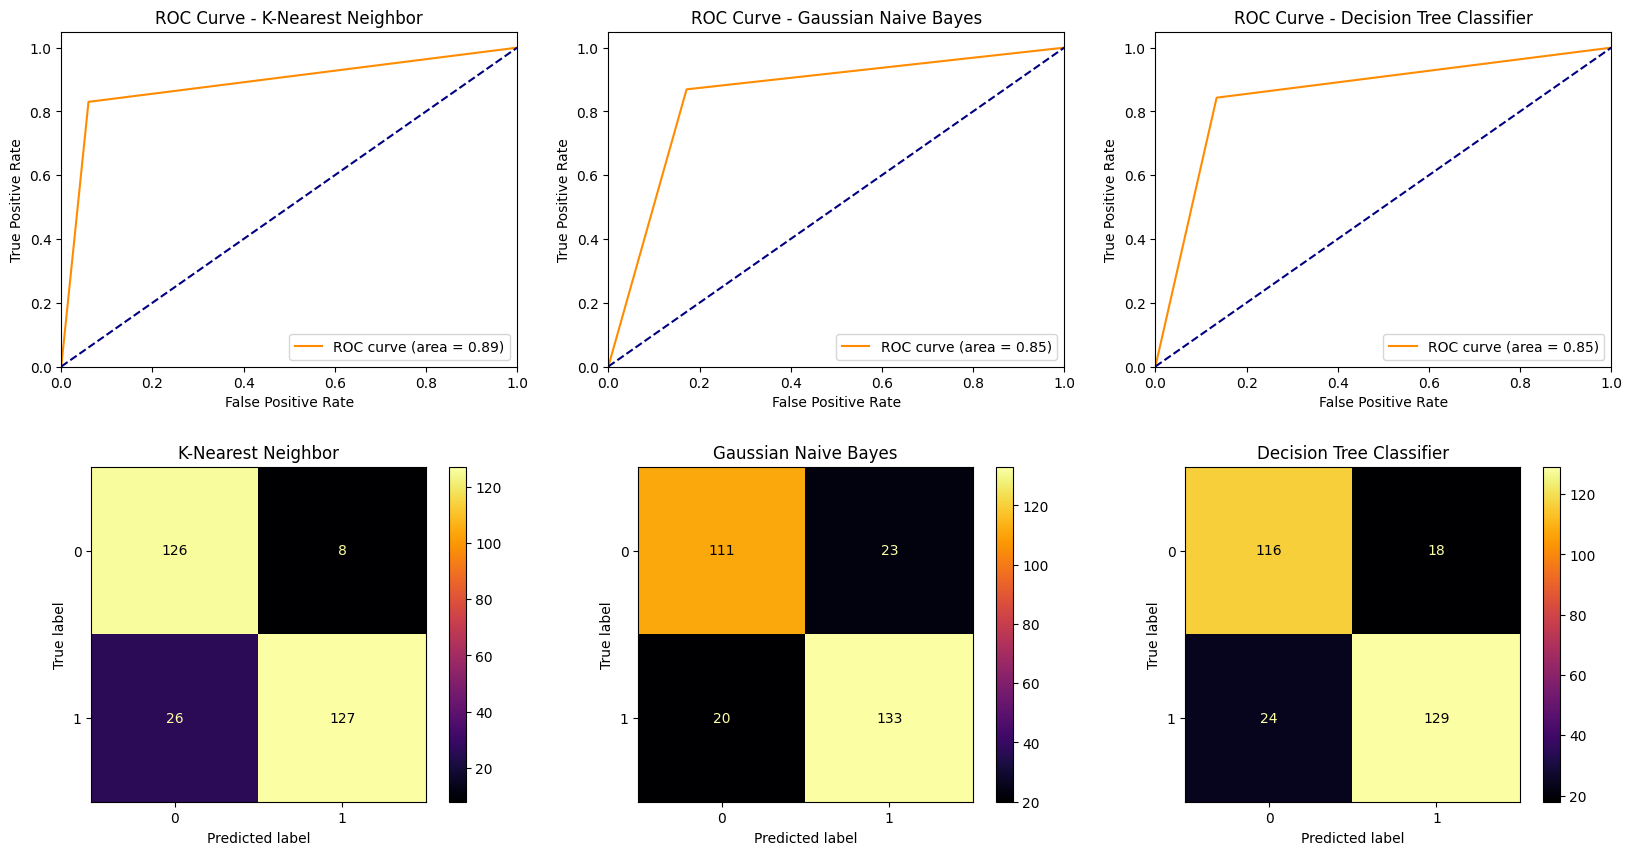

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
K-Nearest Neighbor,88.153310,94.074074,83.006536,88.518193,88.194444
Gaussian Naive Bayes,85.017422,85.256410,86.928105,84.881963,86.084142
Decision Tree Classifier,85.365854,87.755102,84.313725,85.440445,86.000000


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test_scaled)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung precision dan recall
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = 2*pr*rc / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

Berdasarkan visualisasi dan tabel yang telah dibuat, dapat disimpulkan bahwa K-Nearest Neighbor memiliki kinerja yang lebih baik dibandingkan dengan Gaussian Naive Bayes dan Decision Tree Classifier. Hal ini disebabkan oleh tingginya angka yang dihasilkan pada visualisasi dan juga pada tabel akurasi, presisi, recall, dan roc_auc serta f1-score dari ketiga model.

##Deployment
Membuat kesimpulan analisis dan menyimpan data hasil klasifikasi ke dalam sebuah file dengan format csv untuk digunakan dalam Looker Studio (Google Data Studio)

####Summary
Data pada dataset Will Go To College telah dianalisis menggunakan tiga algoritma klasifikasi, yaitu **K-Nearest Neighbor**, **Gaussian Naive Bayes**, dan **C4.5(Decission Tree Classifier)**. Lalu, hasil analisis ini akan dievaluasi menggunakan enam matriks evaluasi pada *Supervised Learning*, yaitu **Confussion Matrix**, **ROC-AUC**, **Accuracy**, **Precision**, **Recal**, dan **F1-Score**. Hasil analisis yang dilakukan menunjukkan rata - rata persentase dari masing - masing matriks evaluasi terhadap ketiga algoritma ini di atas 85%, artinya dataset yang digunakan sangat cocok untuk ketiga algoritma tersebut. Namun, hasil evaluasi paling baik terdapat pada kinerja algoritma **K-Nearest Neighbor** yang rata - rata persentasenya lebih tinggi dibandingkan dengan algoritma lain, dengan ini dapat disimpulkan bahwa algoritma klasifikasi **K-Nearest Neighbor** adalah algoritma yang dapat digunakan untuk analisis dataset Will Go To College.

####Save Dataset
Dataset yang telah dibersihkan pada tahap **Data Preparation** akan disimpan, karena dataset pada proses itu lah yang dapat dikatakan paling baik dan dapat digunakan untuk analisis lainnya, dataset disimpan dengan mengecualikan nilai index, agar proses penggunaannya lebih optimal

In [ ]:
df.to_csv('Go To College - Deployment.csv',index=False)